# Lung Cancer Prediction
<hr>

### Lung Cancer Prediction using Random Forest

In [1]:
import pandas as pd
import numpy as np
import seaborn as sbn
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn import tree
from sklearn import linear_model
from sklearn import ensemble
from sklearn import svm
from sklearn.model_selection import train_test_split

#### Preprocessing the dataset

In [2]:
# Loading dataset into dataset
data_set = pd.read_csv('./dataset/lung-cancer-dataset.csv')

In [3]:
# Check if the dataset is loaded
data_set.head(5)

,GENDER,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL CONSUMING,COUGHING,SHORTNESS OF BREATH,SWALLOWING DIFFICULTY,CHEST PAIN,LUNG_CANCER
0,M,69,1,2,2,1,1,2,1,2,2,2,2,2,2,YES
1,M,74,2,1,1,1,2,2,2,1,1,1,2,2,2,YES
2,F,59,1,1,1,2,1,2,1,2,1,2,2,1,2,NO
3,M,63,2,2,2,1,1,1,1,1,2,1,1,2,2,NO
4,F,63,1,2,1,1,1,1,1,2,1,2,2,1,1,NO


In [4]:
# Get the summary of dataset
data_set.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 309 entries, 0 to 308
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   GENDER                 309 non-null    object
 1   AGE                    309 non-null    int64 
 2   SMOKING                309 non-null    int64 
 3   YELLOW_FINGERS         309 non-null    int64 
 4   ANXIETY                309 non-null    int64 
 5   PEER_PRESSURE          309 non-null    int64 
 6   CHRONIC DISEASE        309 non-null    int64 
 7   FATIGUE                309 non-null    int64 
 8   ALLERGY                309 non-null    int64 
 9   WHEEZING               309 non-null    int64 
 10  ALCOHOL CONSUMING      309 non-null    int64 
 11  COUGHING               309 non-null    int64 
 12  SHORTNESS OF BREATH    309 non-null    int64 
 13  SWALLOWING DIFFICULTY  309 non-null    int64 
 14  CHEST PAIN             309 non-null    int64 
 15  LUNG_CANCER            

In [5]:
# Checking if the null values in the dataset
data_set.isnull().sum()

GENDER                   0
AGE                      0
SMOKING                  0
YELLOW_FINGERS           0
ANXIETY                  0
PEER_PRESSURE            0
CHRONIC DISEASE          0
FATIGUE                  0
ALLERGY                  0
WHEEZING                 0
ALCOHOL CONSUMING        0
COUGHING                 0
SHORTNESS OF BREATH      0
SWALLOWING DIFFICULTY    0
CHEST PAIN               0
LUNG_CANCER              0
dtype: int64

In [6]:
# Setting up a new columns for Gender and Lung cancer results to represent as a numeric data
labeled_gender = LabelEncoder()
labeled_lung_cancer = LabelEncoder()

data_set['GENDER_N'] = labeled_gender.fit_transform(data_set['GENDER'])
data_set['LUNG_CANCER_N'] = labeled_lung_cancer.fit_transform(data_set['LUNG_CANCER'])

In [7]:
data_set.head()

,GENDER,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL CONSUMING,COUGHING,SHORTNESS OF BREATH,SWALLOWING DIFFICULTY,CHEST PAIN,LUNG_CANCER,GENDER_N,LUNG_CANCER_N
0,M,69,1,2,2,1,1,2,1,2,2,2,2,2,2,YES,1,1
1,M,74,2,1,1,1,2,2,2,1,1,1,2,2,2,YES,1,1
2,F,59,1,1,1,2,1,2,1,2,1,2,2,1,2,NO,0,0
3,M,63,2,2,2,1,1,1,1,1,2,1,1,2,2,NO,1,0
4,F,63,1,2,1,1,1,1,1,2,1,2,2,1,1,NO,0,0


In [8]:
# Dropping Gender and Lung cancer results columns as they represent string 
updated_data_set = data_set.drop(['GENDER','LUNG_CANCER'], axis = 'columns')

# Export updated/finalized data set as a new csv
updated_data_set.to_csv('./dataset/lung-cancer-dataset-updated.csv', index=False)
updated_data_set.head()

,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL CONSUMING,COUGHING,SHORTNESS OF BREATH,SWALLOWING DIFFICULTY,CHEST PAIN,GENDER_N,LUNG_CANCER_N
0,69,1,2,2,1,1,2,1,2,2,2,2,2,2,1,1
1,74,2,1,1,1,2,2,2,1,1,1,2,2,2,1,1
2,59,1,1,1,2,1,2,1,2,1,2,2,1,2,0,0
3,63,2,2,2,1,1,1,1,1,2,1,1,2,2,1,0
4,63,1,2,1,1,1,1,1,2,1,2,2,1,1,0,0


#### Data analysis & visualization

<AxesSubplot:xlabel='SMOKING', ylabel='count'>

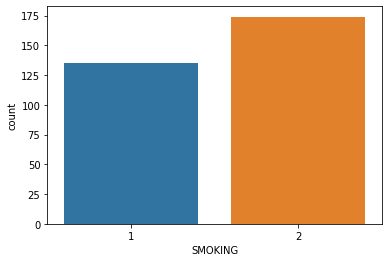

In [39]:
# Visualize smoking posibilities
sbn.countplot(x='SMOKING',data = updated_data_set)

<AxesSubplot:xlabel='LUNG_CANCER_N', ylabel='count'>

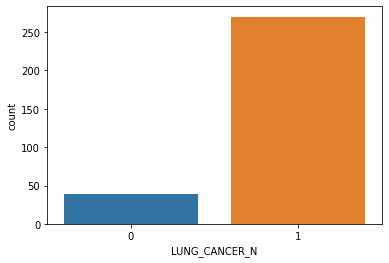

In [36]:
# Visualize lung cancer posibilities
sbn.countplot(x='LUNG_CANCER_N', data = updated_data_set)

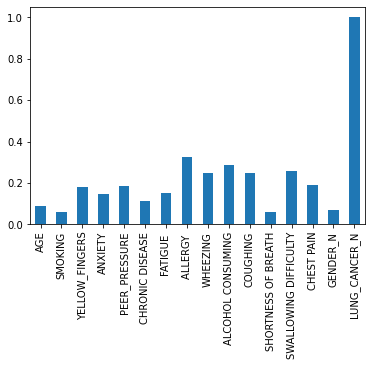

In [11]:
# Visualize corerelation between parameters to lung cancer
correlation=updated_data_set.corrwith(updated_data_set['LUNG_CANCER_N'], method='pearson')
correlation.plot(kind='bar')
plt.show()

<AxesSubplot:xlabel='LUNG_CANCER_N', ylabel='YELLOW_FINGERS'>

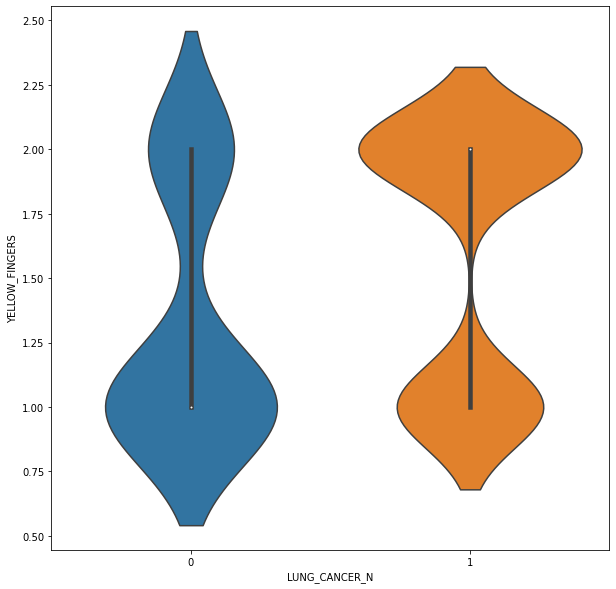

In [40]:
# Visualizing lung cancer posibility with yellow fingers parameter
plt.figure(figsize=(10,10))
sbn.violinplot(x='LUNG_CANCER_N', y='YELLOW_FINGERS', data=updated_data_set)

<AxesSubplot:xlabel='LUNG_CANCER_N', ylabel='AGE'>

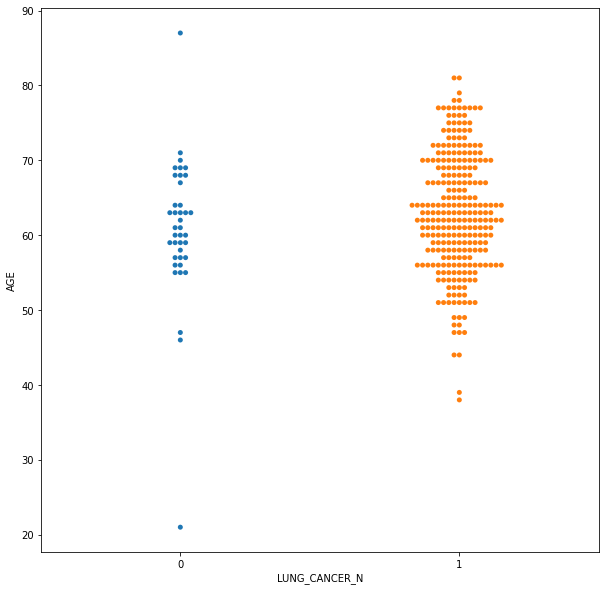

In [41]:
# Visualizing lung cancer posibility with age parameter
plt.figure(figsize=(10,10))
sbn.swarmplot(x='LUNG_CANCER_N', y='AGE', data=updated_data_set)

C:\Users\ACER\AppData\Local\Temp\ipykernel_14716\2528745668.py:4: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared.
  updated_data_set.hist(ax = axis)


array([[<AxesSubplot:title={'center':'AGE'}>,
        <AxesSubplot:title={'center':'SMOKING'}>,
        <AxesSubplot:title={'center':'YELLOW_FINGERS'}>,
        <AxesSubplot:title={'center':'ANXIETY'}>],
       [<AxesSubplot:title={'center':'PEER_PRESSURE'}>,
        <AxesSubplot:title={'center':'CHRONIC DISEASE'}>,
        <AxesSubplot:title={'center':'FATIGUE '}>,
        <AxesSubplot:title={'center':'ALLERGY '}>],
       [<AxesSubplot:title={'center':'WHEEZING'}>,
        <AxesSubplot:title={'center':'ALCOHOL CONSUMING'}>,
        <AxesSubplot:title={'center':'COUGHING'}>,
        <AxesSubplot:title={'center':'SHORTNESS OF BREATH'}>],
       [<AxesSubplot:title={'center':'SWALLOWING DIFFICULTY'}>,
        <AxesSubplot:title={'center':'CHEST PAIN'}>,
        <AxesSubplot:title={'center':'GENDER_N'}>,
        <AxesSubplot:title={'center':'LUNG_CANCER_N'}>]], dtype=object)

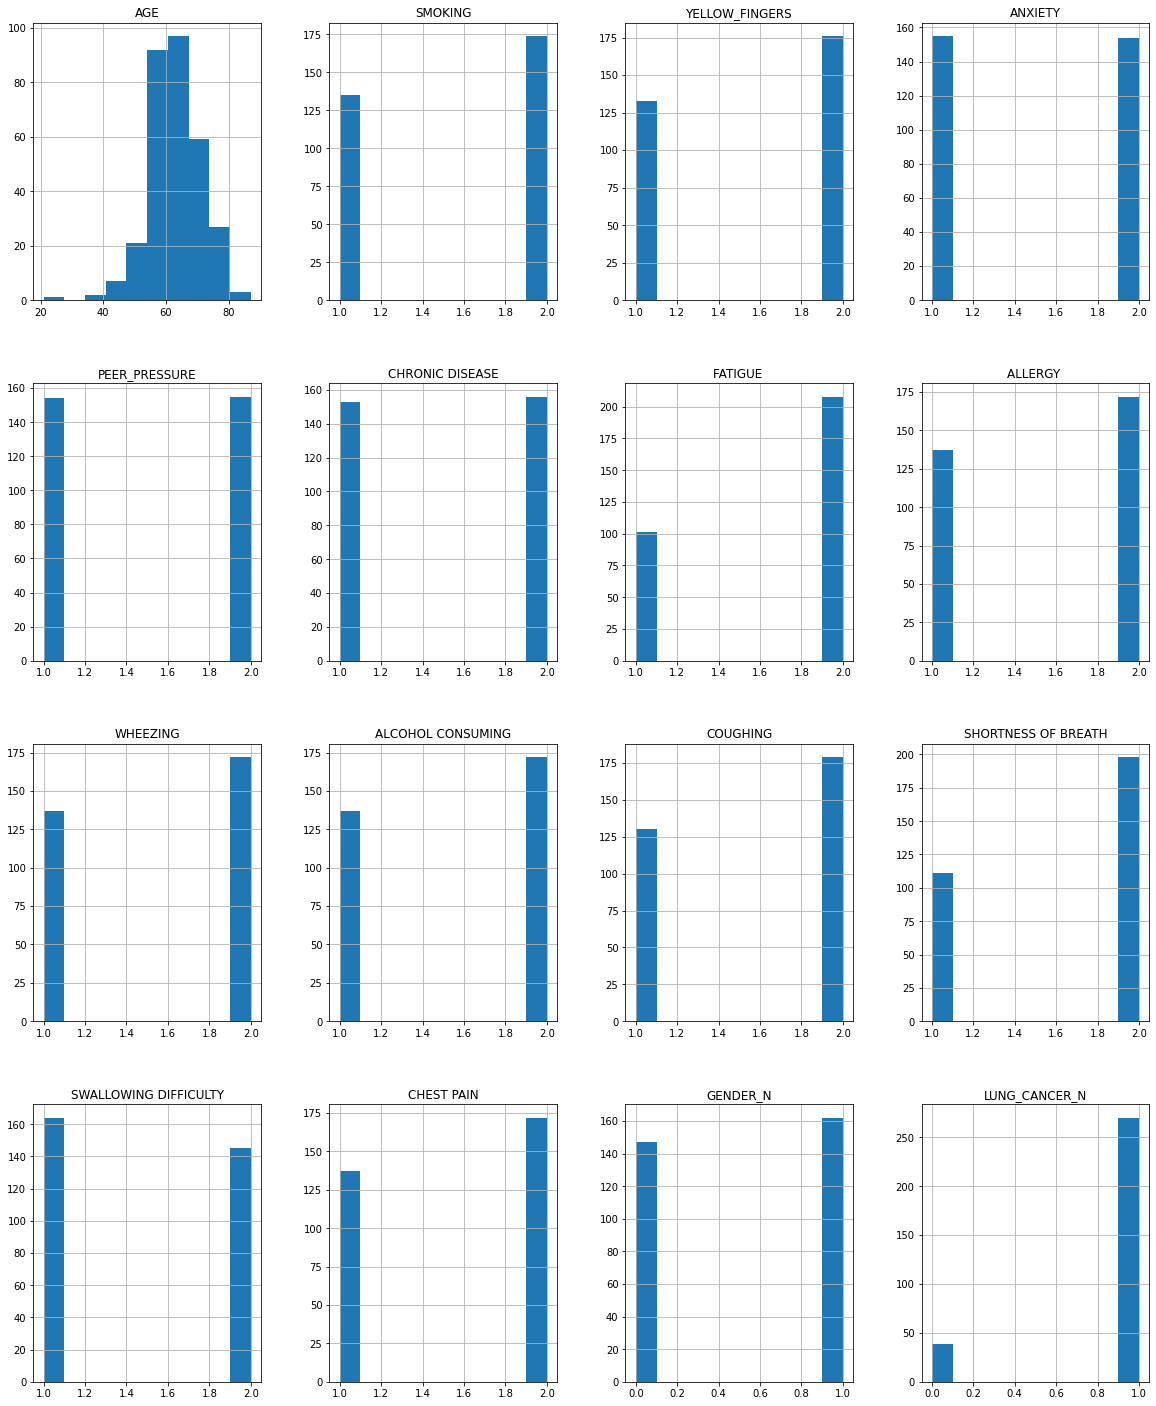

In [42]:
# Visualizing all the parameters
figures = plt.figure(figsize = (20,25))
axis = figures.gca()
updated_data_set.hist(ax = axis)

In [15]:
lc0_data_set = updated_data_set[updated_data_set.LUNG_CANCER_N == 0]
lc1_data_set = updated_data_set[updated_data_set.LUNG_CANCER_N == 1]

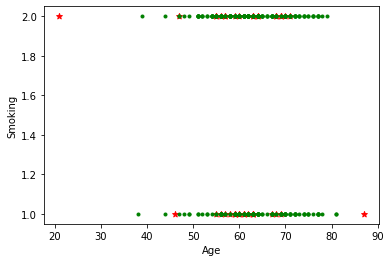

In [16]:
plt.xlabel('Age')
plt.ylabel('Smoking')
plt.scatter(lc0_data_set['AGE'],lc0_data_set['SMOKING'], color='red', marker='*')
plt.scatter(lc1_data_set['AGE'],lc1_data_set['SMOKING'], color='green', marker='.')

In [17]:
input_data_set = updated_data_set.drop('LUNG_CANCER_N', axis = 'columns')
target_data_set = updated_data_set['LUNG_CANCER_N']

In [18]:
input_data_set

,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL CONSUMING,COUGHING,SHORTNESS OF BREATH,SWALLOWING DIFFICULTY,CHEST PAIN,GENDER_N
0,69,1,2,2,1,1,2,1,2,2,2,2,2,2,1
1,74,2,1,1,1,2,2,2,1,1,1,2,2,2,1
2,59,1,1,1,2,1,2,1,2,1,2,2,1,2,0
3,63,2,2,2,1,1,1,1,1,2,1,1,2,2,1
4,63,1,2,1,1,1,1,1,2,1,2,2,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
304,56,1,1,1,2,2,2,1,1,2,2,2,2,1,0
305,70,2,1,1,1,1,2,2,2,2,2,2,1,2,1
306,58,2,1,1,1,1,1,2,2,2,2,1,1,2,1
307,67,2,1,2,1,1,2,2,1,2,2,2,1,2,1


In [19]:
target_data_set

0      1
1      1
2      0
3      0
4      0
      ..
304    1
305    1
306    1
307    1
308    1
Name: LUNG_CANCER_N, Length: 309, dtype: int32

In [20]:
X_train_data, X_test_data, y_train_data, y_test_data = train_test_split(input_data_set, target_data_set, test_size = 0.25, random_state= 40)

In [31]:
RFmodel = ensemble.RandomForestClassifier(n_estimators = 500)
RFmodel.fit(X_train_data,y_train_data)

RandomForestClassifier(n_estimators=500)

In [32]:
RFmodel.score(X_test_data,y_test_data)

0.8846153846153846

In [23]:
def get_inputs():
    inputs = []
    print('Please enter your Information:')
    
    age = input("Enter your AGE ?\n") 
    inputs.append(age)
    smoking = input("Do you SMOKING ? Yes=2, No=1 \n") 
    inputs.append(smoking)
    yellow_fingers = input("Do you have YELLOW FINGERS ? Yes=2, No=1 \n")
    inputs.append(yellow_fingers)
    anxiety = input("Do you have ANXIETY ? Yes=2, No=1 \n") 
    inputs.append(anxiety)
    peer_pressure = input("Do you have PEER PRESSURE ? Yes=2, No=1 \n") 
    inputs.append(peer_pressure)
    chronic_disease = input("Do you have CHRONIC DISEASE ? Yes=2, No=1 \n") 
    inputs.append(chronic_disease)
    fatigue = input("Do you have FATIGUE ? Yes=2, No=1 \n")
    inputs.append(fatigue)
    allergy = input("Do you have ALLERGY ? Yes=2, No=1 \n") 
    inputs.append(allergy)
    wheezing = input("Do you have WHEEZING ? Yes=2, No=1 \n") 
    inputs.append(wheezing)
    alcohol = input("Do you drink too much alcohol ? Yes=2, No=1 \n") 
    inputs.append(alcohol)
    coughing = input("Do you have COUGHING ? Yes=2, No=1 \n") 
    inputs.append(coughing)
    breath = input("Do you have SHORTNESS OF BREATH ? Yes=2, No=1 \n") 
    inputs.append(breath)
    swallowing  = input("Do you have DIFFICULTY SWALLOWING ? Yes=2, No=1 \n") 
    inputs.append(swallowing)
    chest  = input("Do you have CHEST PAIN ? Yes=2, No=1 \n") 
    inputs.append(chest)
    gender = input("Enter your GENDER ? F=0, M=1 \n")
    inputs.append(gender)
    
    result = RFmodel.predict([inputs])
    
    print("\nResult")
    if(result[0] == 1):
        print("You have lung cancer")
    else:
        print("You don't have lung cancer")
    

get_inputs()


Please enter your Information:
Enter your AGE ?
24
Do you SMOKING ? Yes=2, No=1 
1
Do you have YELLOW FINGERS ? Yes=2, No=1 
1
Do you have ANXIETY ? Yes=2, No=1 
2
Do you have PEER PRESSURE ? Yes=2, No=1 
1
Do you have CHRONIC DISEASE ? Yes=2, No=1 
1
Do you have FATIGUE ? Yes=2, No=1 
1
Do you have ALLERGY ? Yes=2, No=1 
1
Do you have WHEEZING ? Yes=2, No=1 
1
Do you drink too much alcohol ? Yes=2, No=1 
1
Do you have COUGHING ? Yes=2, No=1 
1
Do you have SHORTNESS OF BREATH ? Yes=2, No=1 
1
Do you have DIFFICULTY SWALLOWING ? Yes=2, No=1 
1
Do you have CHEST PAIN ? Yes=2, No=1 
1
Enter your GENDER ? F=0, M=1 
1

Result
You don't have lung cancer


C:\Python310\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
